<a href="https://colab.research.google.com/github/JacobGeorge761/TensorFlowGoogleColab/blob/main/neural_network_regression_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rgression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: prediciting a numerical variable based on some combination of variables. Here we will just predict a number

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


#Create some data to view and fit


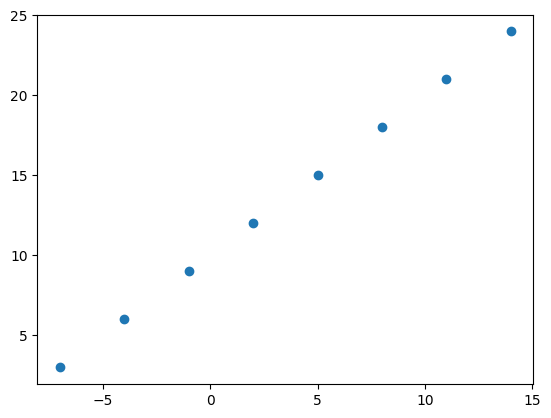

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create lables
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#visualize it
plt.scatter(X,y)

# Input and Output Shapes

In [ ]:
#create demo tensor for housing price problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [ ]:
X[1], y[1]

(np.float64(-4.0), np.float64(6.0))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
# turn out numpy array into a tensor
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

#They have no dimensions here as they are scalar values (single values)
input_shape,output_shape

(TensorShape([]), TensorShape([]))

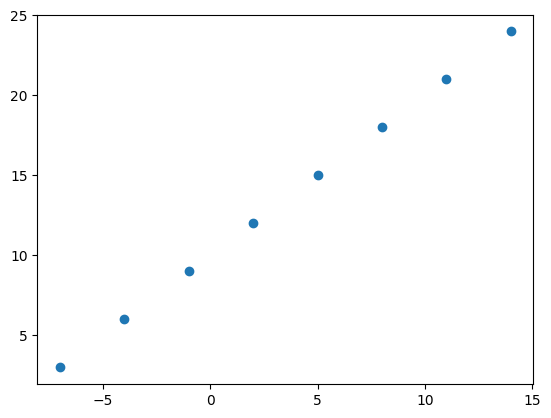

In [ ]:
plt.scatter(X,y)

## Steps in modeling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model
2. Compiling a model - define the loass function (the function that tells our model how wrong it is) and the optimizer (tells out model ho to improve the patterns its learning) and evalutation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X and y (features and lables)

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. create a model using the Sequential API
model = tf.keras.Sequential([#go through the steps sequentially
    tf.keras.layers.Dense(1)#we want to take input (1 number) and make an output (1 number)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,# mae -> mean absolute error
              optimizer=tf.keras.optimizers.SGD(),# sgd -> stochastic gradient descent
              metrics=["mae"])

# X is a 1D array, but Keras Dense layers expect a 2D input
X = tf.expand_dims(X, axis=-1)
#This adds an extra dimension at the end, turning your shape from:
#(batch_size,) → (batch_size, 1)

# 3. Fit the model
model.fit(X, y, epochs=5)# epoch is how many times the model will go through the training examples


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - loss: 11.3122 - mae: 11.3122
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 11.1797 - mae: 11.1797
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 11.0472 - mae: 11.0472
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.9147 - mae: 10.9147
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.7822 - mae: 10.7822


In [ ]:
# check X and y
X,y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
#try and make a prediction with our model
#model.predict() expects the input to be a 2D array-like structure or tensor
#(i.e., shape (batch_size, num_features)), not just a plain Python list
y_pred = model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


## Improving our model

We can imporve our model by altering the steps we took to create a model.

1. Creating a model - maybe add more layers, increase the number of hidden units (neurons) or within each of the hidden layers, change the activation function of each layer

2. Compiling a model - here we might change the optimization function or perhaps the learning rate of the optimization function

3. Fitting a model - here we might fit a model for more epochs (leave it training for longer) or on more data (give it more examples to learn from)

In [ ]:
#lets rebuild our model

# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# fit the model (this time we will train for longer)
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step - loss: 15.0560 - mae: 15.0560
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 14.8461 - mae: 14.8461
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 14.7136 - mae: 14.7136
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 14.5811 - mae: 14.5811
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 14.4486 - mae: 14.4486
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 14.3161 - mae: 14.3161
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 14.1836 - mae: 14.1836
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 14.0511 - mae: 14.0511
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 13.9186 - mae: 13.9186
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 13.7861 - mae: 13.7861
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 13.6536 - mae: 13.6536
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 13.5211 - mae: 13.5211
Epoch 13/100
1/1 

In [ ]:
# remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
#lets see if our model prediction has imporved
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[29.427872]], dtype=float32)

In [ ]:
# lets see if we can make another change to improve our model

# 1. create a model this time with an extra hidden layer with 100 hidden units
model = tf.keras.Sequential([#go through the steps sequentially
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)#we want to take input (1 number) and make an output (1 number)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,# mae -> mean absolute error
              optimizer=tf.keras.optimizers.SGD(),# sgd -> stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)# epoch is how many times the model will go through the training examples


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step - loss: 13.7856 - mae: 13.7856
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 13.2644 - mae: 13.2644
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 12.7424 - mae: 12.7424
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 12.2266 - mae: 12.2266
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 11.7017 - mae: 11.7017
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 11.1590 - mae: 11.1590
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 10.5978 - mae: 10.5978
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.0123 - mae: 10.0123
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 9.3958 - mae: 9.3958
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8.7390 - mae: 8.7390
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.0411 - mae: 8.0411
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7.3068 - mae: 7.3068
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [ ]:
#lets see if our model prediction has imporved
model.predict(tf.constant([[17.0]]))
#seems like our previous model did better even though our loss and mae is lower
#perhaps the model is overfitting

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[31.438375]], dtype=float32)

In [ ]:
# lets see if we can make another change to improve our model

# 1. create a model this time with an extra hidden layer with 100 hidden units
model = tf.keras.Sequential([#go through the steps sequentially
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)#we want to take input (1 number) and make an output (1 number)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,# mae -> mean absolute error
              optimizer=tf.keras.optimizers.SGD(),# sgd -> stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)# epoch is how many times the model will go through the training examples


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step - loss: 12.7789 - mae: 12.7789
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 12.2633 - mae: 12.2633
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 11.7424 - mae: 11.7424
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 11.2137 - mae: 11.2137
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 10.6745 - mae: 10.6745
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.1218 - mae: 10.1218
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 9.5530 - mae: 9.5530
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 8.9651 - mae: 8.9651
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 8.3550 - mae: 8.3550
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 7.7197 - mae: 7.7197
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7.2651 - mae: 7.2651
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 7.2457 - mae: 7.2457
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━

In [ ]:
#lets see if our model prediction has imporved
model.predict(tf.constant([[17.0]]))
#we've reduced the number of hidden units (neurons) and taken away the activation function but the performace on the test has seemingly improved
#even though the mae is slightly higer


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[30.390268]], dtype=float32)

In [ ]:
# lets see if we can make another change to improve our model

# 1. create a model this time with an extra hidden layer with 100 hidden units
model = tf.keras.Sequential([#go through the steps sequentially
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)#we want to take input (1 number) and make an output (1 number)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,# mae -> mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)# epoch is how many times the model will go through the training examples


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step - loss: 13.3153 - mae: 13.3153
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 12.6446 - mae: 12.6446
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 11.9722 - mae: 11.9722
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 11.2961 - mae: 11.2961
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.6144 - mae: 10.6144
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.9254 - mae: 9.9254
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.2264 - mae: 9.2264
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.5148 - mae: 8.5148
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 7.7879 - mae: 7.7879
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 7.0430 - mae: 7.0430
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 6.7600 - mae: 6.7600
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 7.0676 - mae: 7.0676
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
#lets see if our model prediction has imporved
model.predict(tf.constant([[17.0]]))
#worse again if we use Adam() instead of SGD() (with no learning rate param)
#vastly better if used with learing rate of .01. MAE is waaaay down an pred accuracy has improves

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[27.359316]], dtype=float32)

# Evaluating a model

In practice a typical work flow you will go through when building neural networks is:

build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> teak model -> .......... etc

When it comes to evaluation, there are 3 words to memorize:
> "Visualize, Visulaize, Visualize"

It is a good idea to visualize:

The data - what data are we working with? what does it look like?

The model itself - what does our model look like?

The training of a model - how does a model perform while it learns?

The predictions of a model - how do the predictions of a model line up against the original lables?

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#make lables for the data set
y = X + 10 #this is the pattern we want our data to learn
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

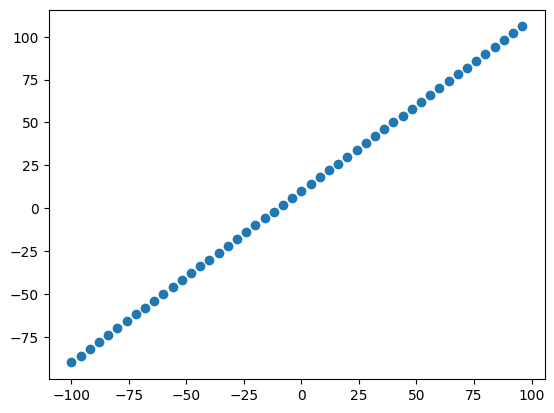

In [ ]:
#visulaize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets...

* Training set - the model learns from this data ~ 70-80% of the available data

* Validation set - the model gets tuned on this data ~ 10-15% of the data available

* Test set - the model gets evaluated on this data to test what it has learned, this set is ~ 10-15% of the total data available

In [ ]:
# check the length of how many samples we have
len(X)

50

In [ ]:
# X is a 1D array, but Keras Dense layers expect a 2D input
X = tf.expand_dims(X, axis=-1)
#This adds an extra dimension at the end, turning your shape from:
#(batch_size,) → (batch_size, 1)
X

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56],
       [  60],
       [  64],
       [  68],
       [  72],
       [  76],
       [  80],
       [  84],
       [  88],
       [  92],
       [  96]], dtype=int32)>

In [ ]:
# split the data into test and train (no train_test_split for tensors)
X_train = X[:40] #80% of the data
y_train = y[:40]

X_test = X[40:]#20% of the data
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### visualizing the data again

Now that we have out data in train and test sets, we will visualize again

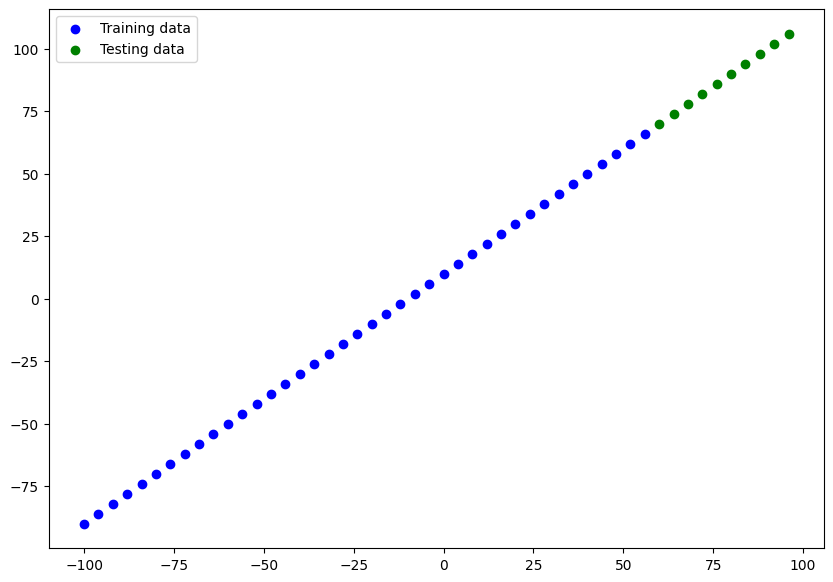

In [ ]:
plt.figure(figsize=(10,7))
# plot training data in blue
plt.scatter(X_train,y_train, c="b", label="Training data")
# plot testing data in green
plt.scatter(X_test,y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44],
        [  48],
        [  52],
        [  56]], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# How to build a neural network for our data

# creat the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # fit the model
# model.fit(X_train, y_train, epochs=100)

# Visualize the model

In [ ]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X[0].shape

TensorShape([1])

In [ ]:
#lets create a model that builds automatically by defining the input_shape argument
tf.random.set_seed(69)

# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    #tf.keras.layers.Dense(10, input_shape=[1], name="middle_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model1")

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
              metrics=["mae"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model

* Trainable params - these are the parameters (patterns) the model can update as it trains

* Non-trainable params - these parameters are not updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**)

In [ ]:
# fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# get a summary
model.summary()

Model: "model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

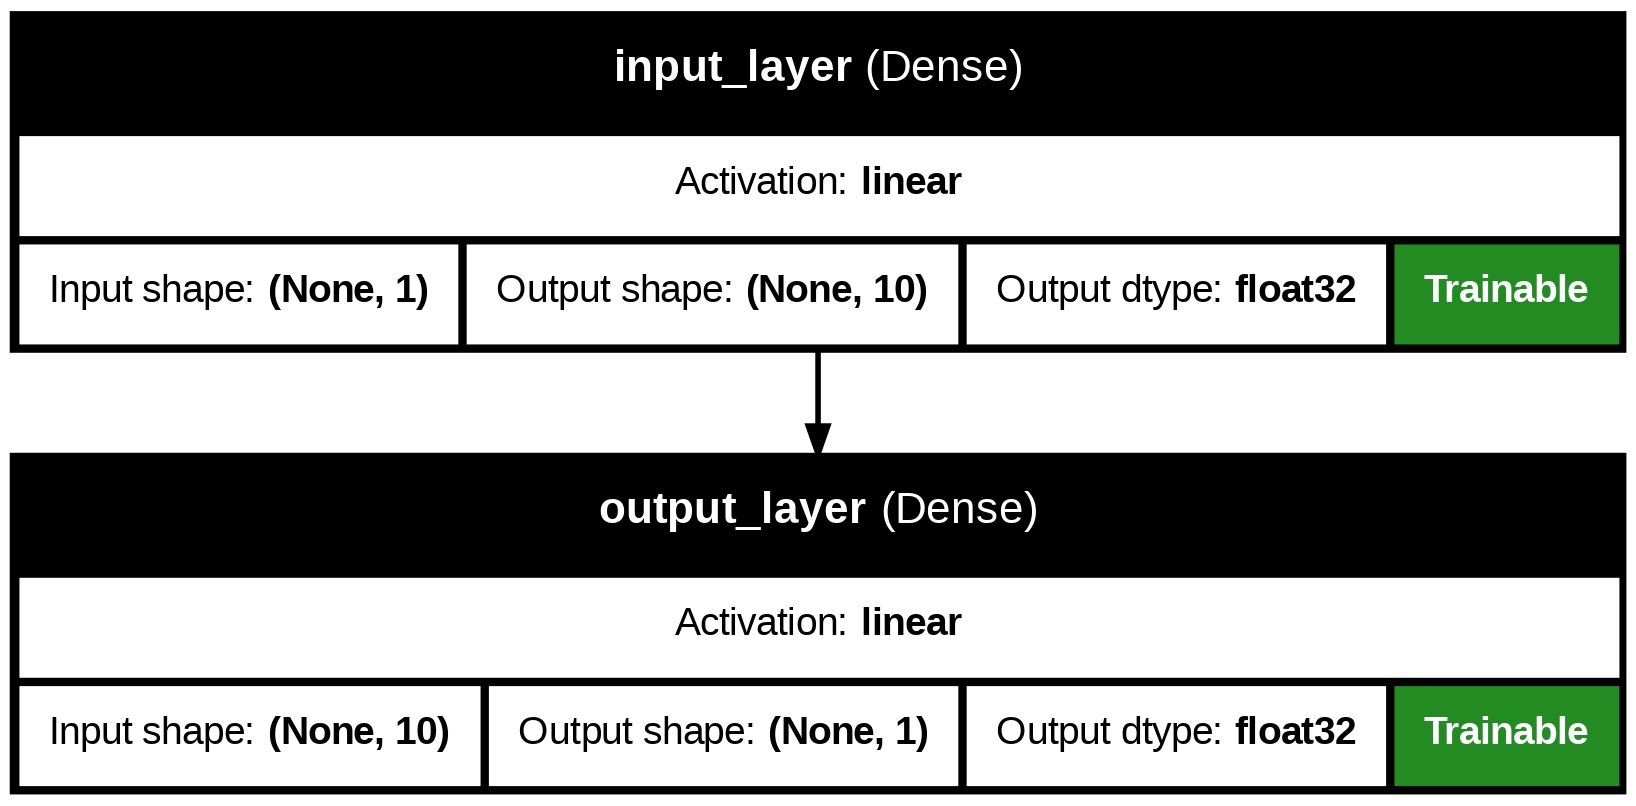

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True, show_dtype=True)

### Visualize our models predictions

To visualize predictions, its a good idea to plot them against the ground truth labels.

Often it will be in the form of 'y_test' or 'y_true' versus 'y_pred'

In [ ]:
# make predictions to make y_pred
y_pred=model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[ 70.36699 ],
       [ 74.403145],
       [ 78.43929 ],
       [ 82.47545 ],
       [ 86.51159 ],
       [ 90.547745],
       [ 94.5839  ],
       [ 98.62005 ],
       [102.656204],
       [106.69235 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# lets build a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training date in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #plot models predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  #show legend
  plt.legend();

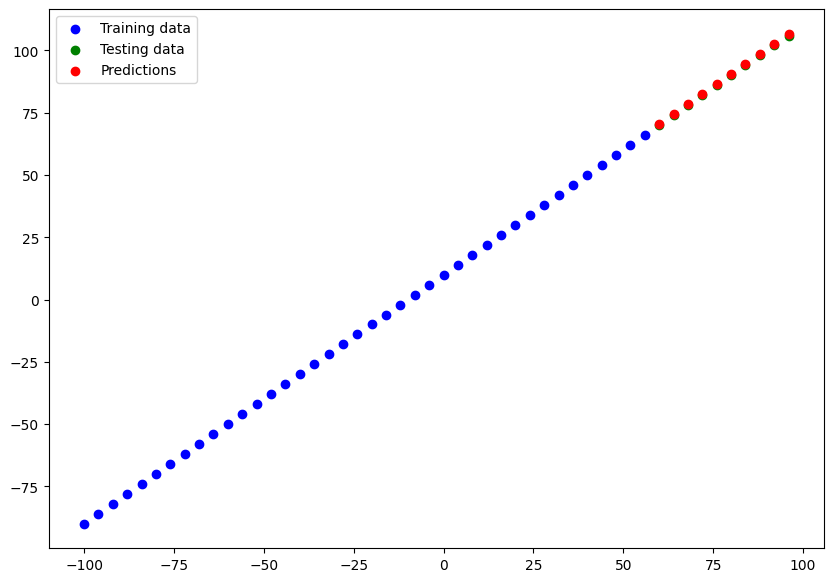

In [ ]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

# Evaluating our models predictions with regression evaluation metrics

Depending on the problem we are working on there will be different evaluation metrics to evaluate your models performance.

Since we are working on a regression problem, two of the main metrics:

* MAE - mean absolute error, on average, how wrong is each of our models predictions

* MSE - mean squared error, "square the average errors"

In [ ]:
#evaluate model on the test
model.evaluate(X_test, y_test)
#this defaults to mae becasue we set the loss and metric to mae during compilation


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 0.5297 - mae: 0.5297


[0.5296714901924133, 0.5296714901924133]

In [ ]:
#calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

0.5296714901924133

In [ ]:
#calculate the mean square error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.29133397340774536

In [ ]:
# make some functions to resure mse and mae
def mae(y_true, y_pred):
  return mean_absolute_error(y_true, y_pred)

def mse(y_true, y_pred):
  return mean_squared_error(y_true, y_pred)

### Running experiments to improve our model

Experiment, Experiment, Experiment

1. Get more data - get more examples for your model to train on (more oppertunities to learn patterns or relationships between features and lables)

2. Make your model larger (using a more comples model) - this might come in the form of more layers or more hidden units in each of the layers

3. Train for longer - give our model more of a chance to find patterns in the data


Lets do 3 modeling experiments:

1. model_1 - same as the original model, 1 layer, trained for 100 epochs (WE WILL STICK WITH THE SGD OPTIMIZER INSTEAD OF ADAM LIKE WE USED IN THE OG)

2. model_2 - 2 layers, trained for 100 epochs. Also use MSE instead of MAE for training

3. model_3 - 2 layers, trained for 500 epochs. Also use MSE instead of MAE for training

In [ ]:
#lets create a model_1
tf.random.set_seed(69)

# create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 52.9721 - mae: 52.9721 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 19.1398 - mae: 19.1398
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.1655 - mae: 8.1655
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 10.0668 - mae: 10.0668
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.0293 - mae: 10.0293
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 9.9918 - mae: 9.9918
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.9543 - mae: 9.9543 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 9.9167 - mae: 9.9167 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 9.8792 - mae: 9.8792 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9.8417 - mae: 9.8417 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 9.8042 - mae: 9.8042 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 9.7667 - mae: 9.7667 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


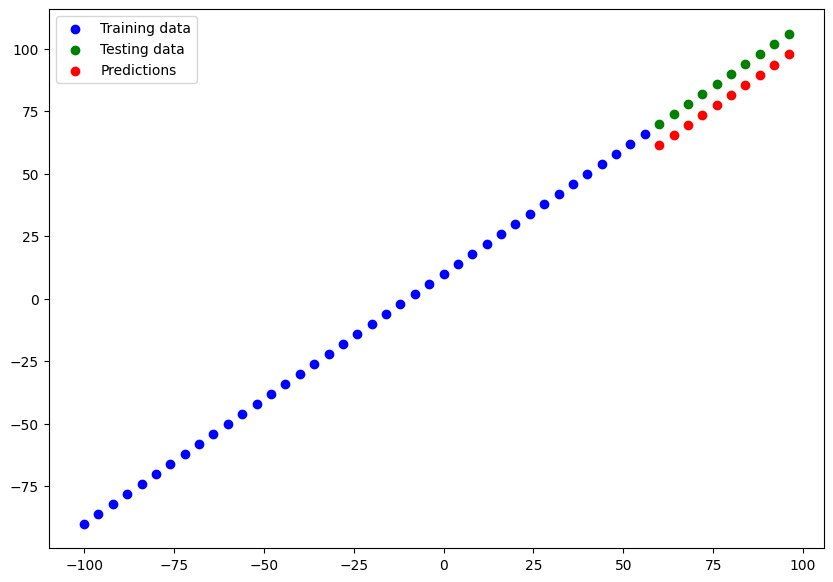

In [ ]:
#make and plot preds for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(8.332887649536133, 69.43785095214844)

In [ ]:
# lets build our second model
# 2 dense (fully connected) layers trained for 100 epochs
# use mse for training instead of mea like before

tf.random.set_seed(69)

#create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# fit the model
model_2.fit(X_train,y_train,epochs=100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 61.9435 - mse: 5871.8003 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 23.0735 - mse: 821.9027
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.0589 - mse: 214.0895
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14.7181 - mse: 290.7057
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.9345 - mse: 303.9344
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 15.2776 - mse: 323.9481
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.7938 - mse: 201.2299
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.6889 - mse: 196.6642
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 12.5284 - mse: 190.4974
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.3314 - mse: 183.4551
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.1113 - mse: 176.1227
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.8772 - mse: 168.9202
Epoch 13/10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


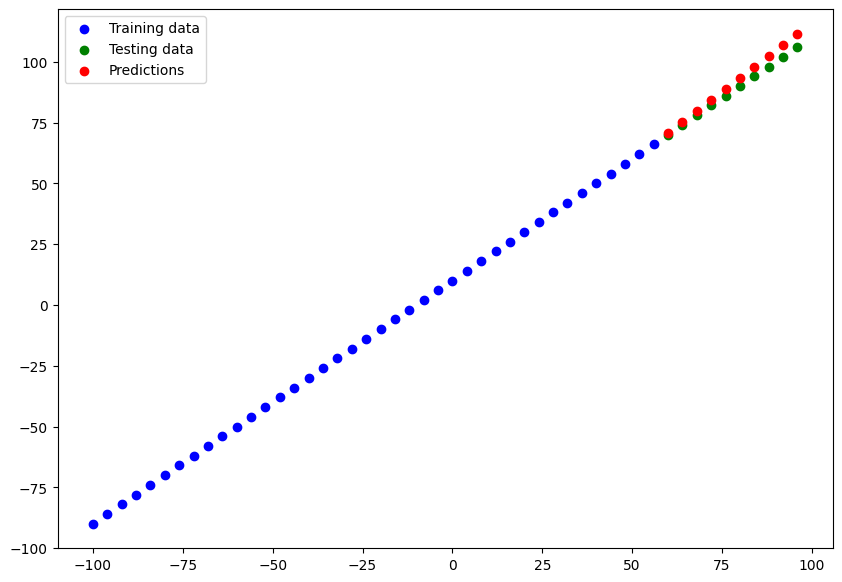

In [ ]:
# make and plot predictions for model 2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# calculate metrics for model 2
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(3.0636138916015625, 11.783900260925293)

In [ ]:
# build model 3
# 2 layers trained for 500 epochs
# also use MSE for training

tf.random.set_seed(69)

#build model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

#fit the model
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 41.9232 - mse: 2401.9639 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 34.4110 - mse: 1579.2664
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 30.5116 - mse: 1296.5822
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 30.4631 - mse: 1324.5538
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.3433 - mse: 221.1055
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 20.2118 - mse: 547.1200
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.1641 - mse: 149.9159
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.6108 - mse: 164.0665
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.4299 - mse: 158.9202
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.2202 - mse: 153.8102
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.9926 - mse: 149.0261
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.7548 - mse: 144.7648
Epoch 13

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


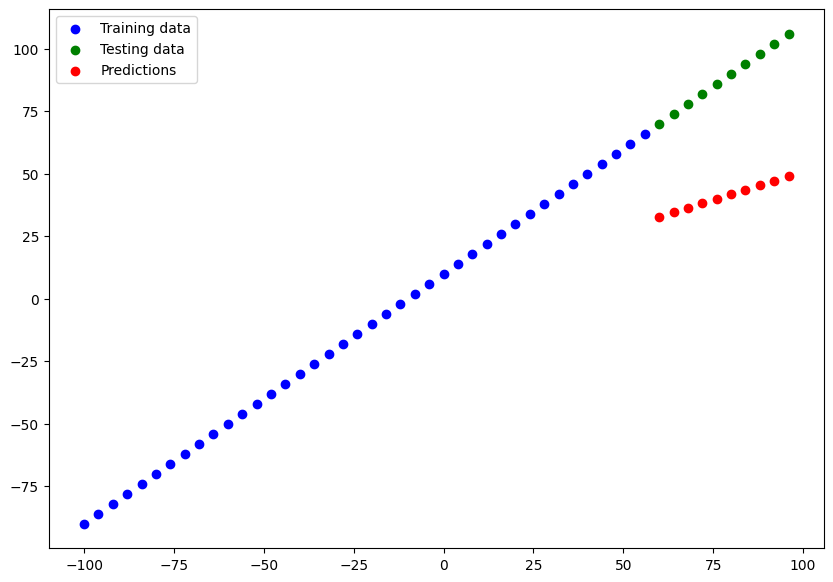

In [ ]:
# make and plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

Looks like as a result of training the model too long, it has resulted in overfitting

In [ ]:
# Lets evaluate model 3
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3, mse_3

(47.02311325073242, 2251.108642578125)

## Comparing the results of our experiments

In [ ]:
# lets compare our models reuslts using a pandas data frame
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=["models", "mae", "mse"])
all_results


,models,mae,mse
0,model_1,8.332888,69.437851
1,model_2,3.063614,11.783900
2,model_3,47.023113,2251.108643


In [ ]:
model_2.summary()
#looks like model 2 performed the best

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Tracking your experiments

One good habit in modeling is to track the results of your experiments.

There are tools we can use to help us.

* TensorBoard - a component of the tensorflow library

* Weights and Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

# Saving Our Models

Saving our models allows us to use them outside whever ever they were trained. Such as a web app or mobile app.

There are two main formats we can save models to:

1. The SavedModel format
2. The HDF5 format

In [ ]:
#save model
model_2.save("best_model_ever.keras")

In [ ]:
#save model in HDF5 (hierarchical data format)
model_2.save("best_model_ever.h5")

## Loading in a saved model

In [ ]:
# load in the savedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_ever.keras")
loaded_SavedModel_format.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_2.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

We can see the architectures of the two models are the same but lets see if the predictions line up

In [ ]:
#compare model_2 predictions with savedmodel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#load in the model using the h5 format
loaded_h5_format = tf.keras.models.load_model("best_model_ever.h5")
loaded_h5_format.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
#compare model_2 predictions with h5 format model predictions
model_2_preds = model_2.predict(X_test)
loaded_h5_format_preds = loaded_h5_format.predict(X_test)

model_2_preds == loaded_h5_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model or any other file from Goodle Colab

If you want to download your files from colab:

1. Go to files tab and click download

2. Use code like the cell below

3. Save it to google drive

In [ ]:
#download from colab
#from google.colab import files
#files.download("best_model_ever.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Save a file from colab into google drive
#!cp /content/best_model_ever.h5 /content/drive/MyDrive

In [ ]:
#!ls /content/drive/MyDrive

'bash script.gdoc'
 best_model_ever.h5
'Colab Notebooks'
'CREDIT CHECK.gdoc'
'East of Eden discussion questions Revised.gdoc'
'EMAIL DD2807-2.gdoc'
'ENLISTED Application.gdoc'
 Final_Exam_Study_Guide.gdoc
'Personal Narrative.gdoc'
'Physical Fitness'
'Self Introduction Template (1).pptx.gslides'
'Self Introduction Template.pptx.gslides'
'What Happened to Baby Dinosaurs.pptx.gslides'
